### Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq
using StaticArrays

### Functions

In [4]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

### Parametres

In [68]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1 = -0.17; k2 = -0.17;
el_link = 0.0
condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, k1, k2, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, …, 4.0, 2.0, -0.17, -0.17, 0.0]

### orbitdiagram

#### range parametres and him length

In [95]:
start_p = 0.0
end_p = 0.4
len = 2000

2000

#### initialize hyperparametres for orbitdiagram

In [96]:
ds = ds_HR1 # init construct system
pvalues = range(start_p, stop = end_p, length = len) # range param
plane = (2, 0.0) # plane for poincare map
tf = 3000.0 # number saving of dots 
tr = 2000.0 # time integrate before save dots
p_index = 12 # index changable param

12

#### calculate orbitdiagram

In [97]:
i = 1
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr;
                              diffeq = (alg = Vern9(), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

In [98]:
i = 4
output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr;
                              diffeq = (alg = Vern9(), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

#### summ two output 

In [99]:
output_summ = output + output1;

#### visualization 

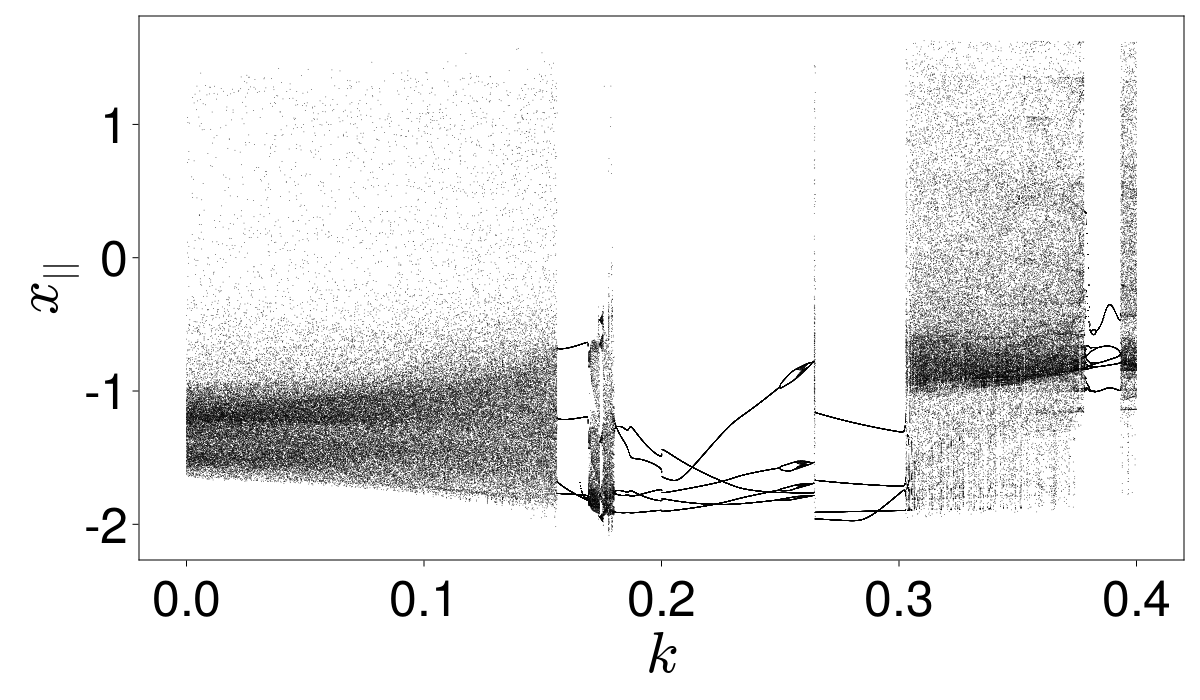

In [101]:
CairoMakie.activate!()
ticks = range(0.0, 0.5, length = 6)

fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 1.0), markersize = 0.8
    )
    
end
fig

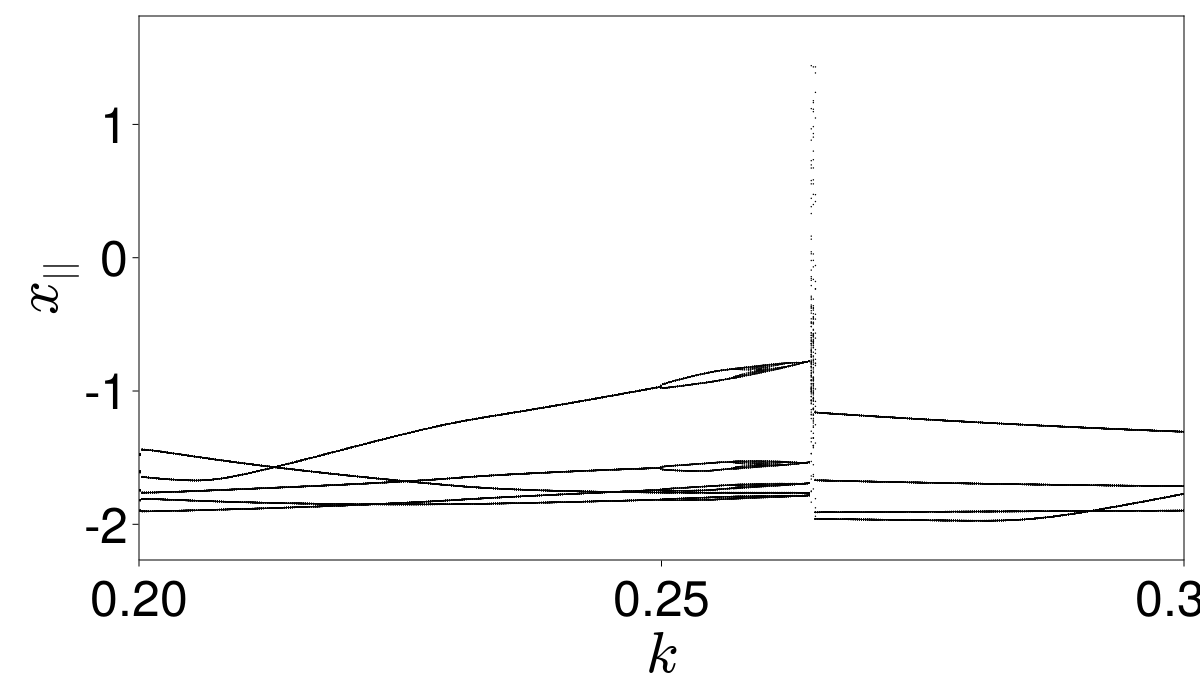

In [111]:
ps, pf = 0.2, 0.3
ticks = range(ps, pf, length = 3)
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )

ax.xticks = ticks
xlims!(ps, pf)
ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.5)
end
fig

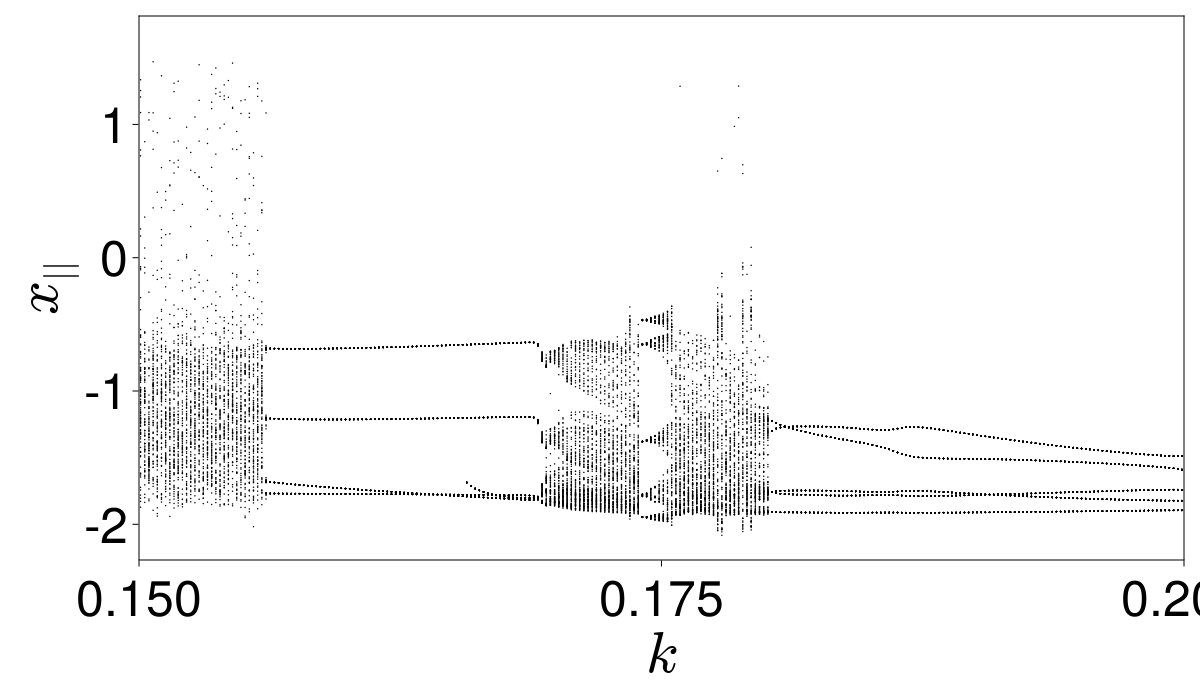

In [112]:
ps, pf = 0.15, 0.2
ticks = range(ps, pf, length = 3)
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )

ax.xticks = ticks
xlims!(ps, pf)
ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.5)
end
fig

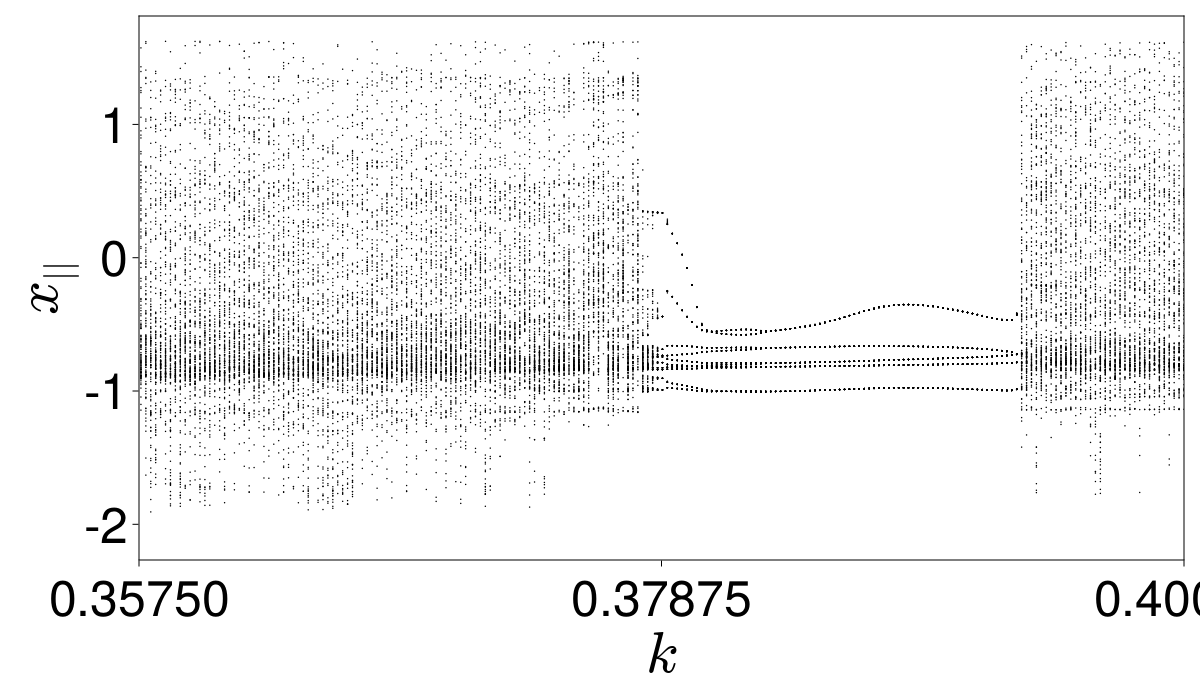

In [116]:
ps, pf = 0.3575, 0.4
ticks = range(ps, pf, length = 3)
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{||}",
xlabelsize = 60, ylabelsize = 60,
xticklabelsize = 50, yticklabelsize = 50  )

ax.xticks = ticks
xlims!(ps, pf)
ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j]; color = ("black", 1.0), markersize = 1.5)
end
fig